In [4]:
import os, sys, glob
os.environ['R_HOME'] = sys.exec_prefix + '/lib/R/'
import numpy as np
import scanpy as sc
import scFates as scf
import matplotlib.pyplot as plt

In [5]:
geo = 'rRNAModifications'
pth = os.path.join('..', '..')
pth_data = os.path.join(pth, 'data')
pth_unzip = os.path.join(pth_data, 'unzip', geo)
pth_out = os.path.join(pth_data, 'trajectories')
pth_feat = os.path.join(pth_data, 'features')
pth_fig = os.path.join(pth, 'figures', 'preprocessing')

In [6]:
fn = glob.glob(os.path.join(pth_unzip, 'ncc*.h5ad'))[0]
adata = sc.read_h5ad(fn); adata

AnnData object with n_obs × n_vars = 1900 × 7911
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'RNA_snn_res.0.1', 'seurat_clusters', 'age', 'sample', 'RNA_snn_res.0.5', 'ident', 'celltype', 'velocity_self_transition', 't', 'seg', 'edge', 'milestones'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'velocity_genes', 'mean', 'std', 'p_val', 'A', 'fdr', 'st', 'signi'
    uns: 'celltype_colors', 'graph', 'hvg', 'log1p', 'milestones_colors', 'neighbors', 'ppt', 'pseudotime_list', 'recover_dynamics', 'root->neuroglial<>mes_fork', 'seg_colors', 'stat_assoc_list', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_R', 'X_pca', 'X_umap', 'velocity_umap'
    layers: 'fitted', 'logcounts', 'scaled'
    obsp: 'connectivities', 'distances'

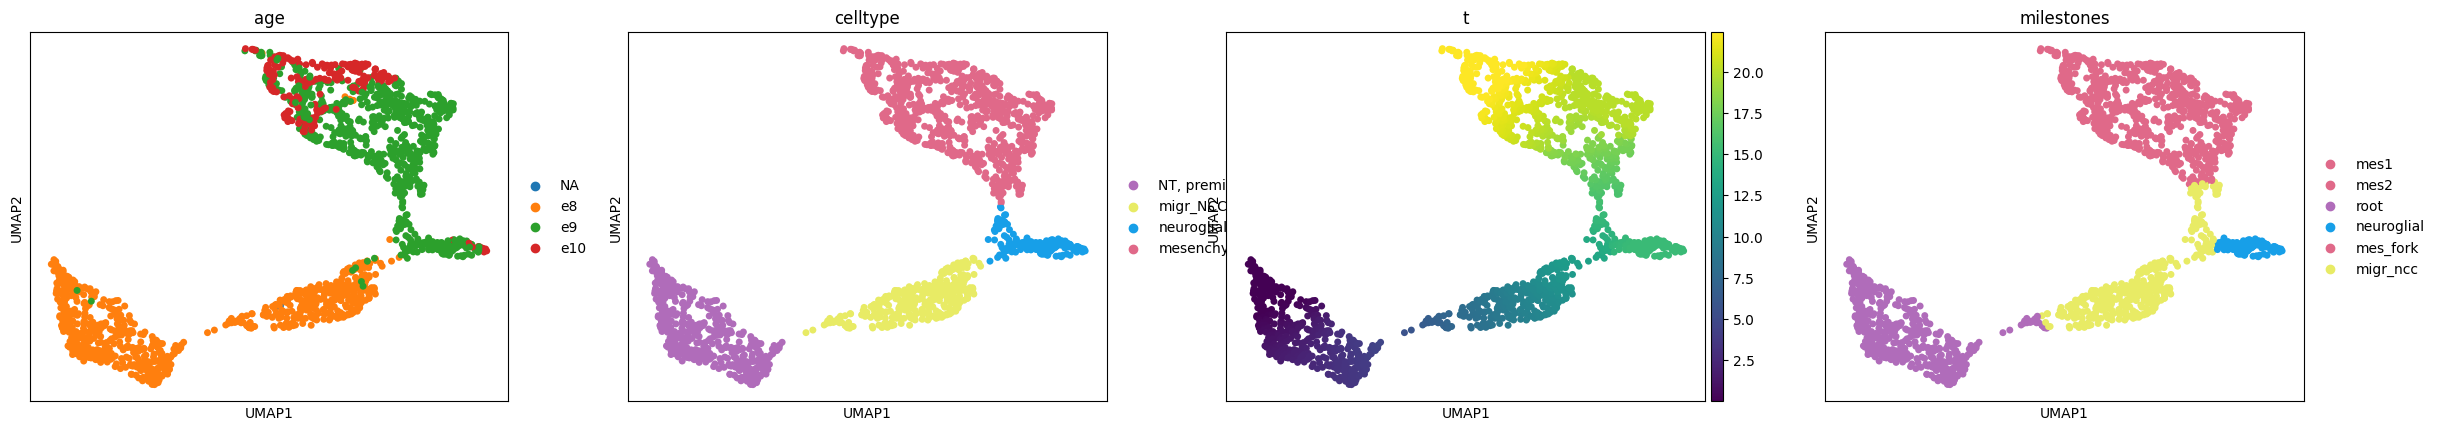

In [7]:
sc.pl.umap(adata, color = ['age', 'celltype', 't', 'milestones'], size = 100)

In [8]:
adata = adata[adata.obs.milestones != 'neuroglial'].copy()
adata

AnnData object with n_obs × n_vars = 1786 × 7911
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'RNA_snn_res.0.1', 'seurat_clusters', 'age', 'sample', 'RNA_snn_res.0.5', 'ident', 'celltype', 'velocity_self_transition', 't', 'seg', 'edge', 'milestones'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'velocity_genes', 'mean', 'std', 'p_val', 'A', 'fdr', 'st', 'signi'
    uns: 'celltype_colors', 'graph', 'hvg', 'log1p', 'milestones_colors', 'neighbors', 'ppt', 'pseudotime_list', 'recover_dynamics', 'root->neuroglial<>mes_fork', 'seg_colors', 'stat_assoc_list', 'velocity_graph', 'velocity_graph_neg', 'velocity_params', 'age_colors'
    obsm: 'X_R', 'X_pca', 'X_umap', 'velocity_umap'
    layers: 'fitted', 'logcounts', 'scaled'
    obsp: 'connectivities', 'distances'

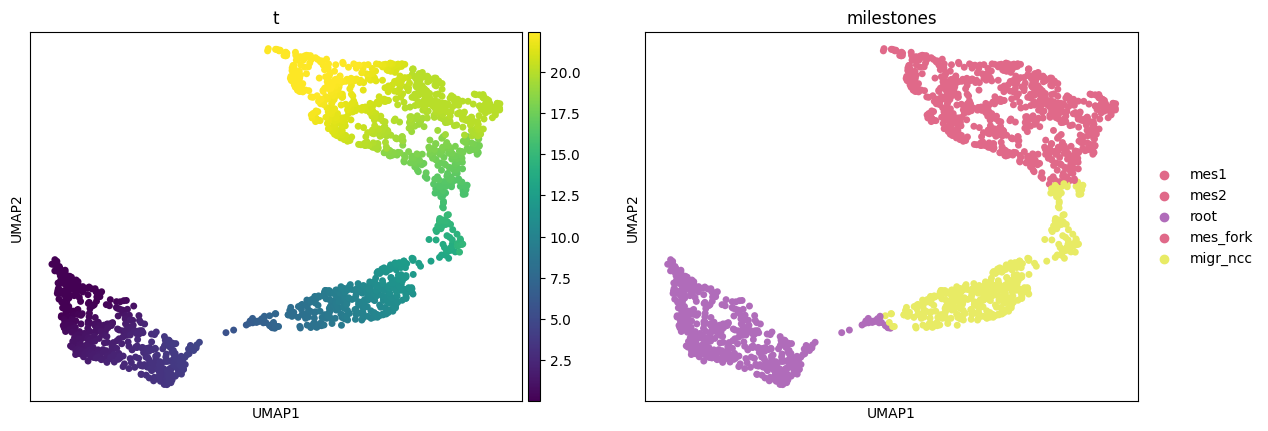

In [9]:
sc.pl.umap(adata, color = ['t', 'milestones'], size = 100)

In [10]:
adata.write(os.path.join(pth_out, f'{geo}.h5ad'))

/home/caleb/miniconda3/envs/scFates/lib/python3.11/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


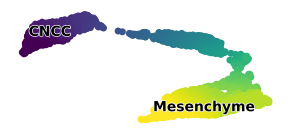

In [38]:
s = 100
fig, ax = plt.subplots(1, 1, figsize = (3.5, 1.5))
sc.pl.umap(adata, color = 't', size = s, colorbar_loc = None,
           frameon = False, show = False, ax = ax)
scf.pl.milestones(adata, basis = 'umap', annotate = True,
                  alpha = 0, show = False, ax = ax)
ax.invert_yaxis(); ax.set_title('')

label_dict = {'migr_ncc'   : '',
              'mes_fork'   : '',
              'mes2'       : '',
              'neuroglial' : '',
              'root'       : 'CNCC',
              'mes1'       : 'Mesenchyme'}
pos_dict = {'root' : (.75, -1.25),
            'mes1' : (1.75, -.25)}

for label in ax.texts:
    _label_ = label.get_text()
    x, y = label.get_position()
    if _label_ in label_dict:
        label.set_text(label_dict[_label_])
    if _label_ in pos_dict:
        dx, dy = pos_dict[_label_]
        label.set_position([x + dx, y + dy])

fn = os.path.join(pth_fig, 'trajectories', f'{geo}.pdf')
plt.savefig(fn, bbox_inches = 'tight')

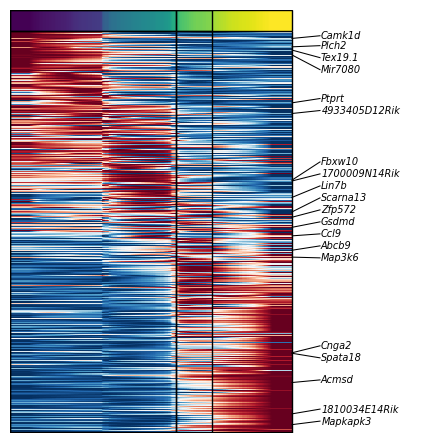

In [46]:
ax = scf.pl.trends(adata, features = adata.var_names,
                   root_milestone = 'root', milestones = ['mes1'],
                   ordering = 'quantile', n_features = 20,
                   offset_names = .1, fontsize = 7,
                   style = 'italic', plot_emb = False,
                   figsize = (6, 5.5), show = False)
fn = os.path.join(pth_fig, 'features', f'{geo}.pdf')
plt.savefig(fn, bbox_inches = 'tight')